# **IMPORT CÁC THƯ VIỆN CẦN THIẾT CHO XỬ LÝ DỮ LIỆU VÀ HUẤN LUYỆN MÔ HÌNH**

In [1]:
#import pandas và numpy để đọc và xử lý dữ liệu
import pandas as pd
import numpy as np

#import matplotlib và seaborn để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime để xử lý dữ liệu thời gian
import datetime

#import sklearn để xử lý và biến đổi dữ liệu
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#import tensorflow, keras để build và sử dụng model LSTM
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

#import os để xử dụng GPU 
import os

#bỏ qua các cảnh báo
import warnings
warnings.filterwarnings("ignore")

# **XÂY DỰNG MODEL**

In [2]:
#Xây dựng model 
class Model(tf.keras.models.Sequential):
    #khởi tạo model
    def __init__(self):
        super().__init__()
        self.model = tf.keras.models.Sequential()
        for layer in self.model.layers:
          self.model.layer.trainable = False
        self.model.add(LSTM(units=7, activation= "relu", input_shape=(1, 5), return_sequences=True))
        self.model.add(Dropout(0.3))

        self.model.add(LSTM(units=64, activation= "relu", return_sequences=True))
        self.model.add(Dropout(0.3))

        self.model.add(LSTM(units=128, activation= "relu"))
        self.model.add(Dropout(0.3))
        self.model.add(Dense(1))
    
    #xây dựng hàm compile
    def compile(self):
        self.model.compile(optimizer="adam",loss="mse")
    
    #xây dựng hàm fit dữ liệu
    def fit(self, X_train, y_train, batch_size, epochs, callbacks, validation_split):
        self.model.fit(x= X_train, y= y_train, batch_size= batch_size, epochs= epochs, callbacks= callbacks, validation_split= validation_split)
    
    #xây dựng hàm evaluate
    def evaluate(self, X_test, y_test):
        evaluation = self.model.evaluate(X_test, y_test)
        print("Mean Squared Error: ", evaluation)
        
    #xây dựng hàm predict
    def predict(self, X_test):
        return self.model.predict(X_test)
        
    #xây dựng hàm summary    
    def summary(self):
        return self.model.summary()
    
    #xây dựng hàm save model
    def save(self, name= "model_predict_stock"):
        self.model.save(f"{name}.h5")


# **XỬ LÝ DỮ LIỆU VÀ KHAI PHÁ**

In [3]:
#đọc dữ liệu bằng hàm read_csv() trong pandas
FPT = pd.read_csv("/kaggle/input/stock-prediction/FPT.csv")
MSN = pd.read_csv("/kaggle/input/stock-prediction/MSN.csv")
PNJ = pd.read_csv("/kaggle/input/stock-prediction/PNJ.csv")
VIC = pd.read_csv("/kaggle/input/stock-prediction/VIC.csv")

In [4]:
#coi 5 dòng đầu dữ liệu bằng hàm .head()
FPT_head = FPT.head()
MSN_head = MSN.head()
PNJ_head = PNJ.head()
VIC_head = VIC.head()

print(FPT_head)
print(MSN_head)
print(PNJ_head)
print(VIC_head)

  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0
  Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
0    MSN  12/25/2017 9:15  73.1  73.1  73.1   73.1    4210              0
1    MSN  12/25/2017 9:16  73.0  73.0  73.0   73.0    5000              0
2    MSN  12/25/2017 9:18  73.5  73.5  73.5   73.5     210              0
3    MSN  12/25/2017 9:20  73.2  73.5  73.1   73.1    2050              0
4    MSN  12/25/2017 9:21  73.0  73.0  73.0   73.0    1380              0
  Ticker       Date/Time   Open   High    Low  Close  Volume  Open Interest
0    PNJ  2/28/201

In [5]:
#nối 4 bộ dữ liệu lại thành 1 bằng hàm concatinate()
#đặt tham số "ignore_index=True" để bỏ qua index của từng bộ

#nối dữ liệu của FPT và MSN thành 1 bộ, đặt tên biến là dataset
dataset = pd.concat([FPT, MSN], ignore_index= True)

#tiếp tục nối biến dataset với PNJ thành 1 bộ, đặt tên biết là dataset
dataset = pd.concat([dataset, PNJ], ignore_index= True)

#tiếp tục nối biến dataset với VIC thành bộ dữ liệu hoàn chỉnh, 
#đặt tên biến là dataset
dataset = pd.concat([dataset, VIC], ignore_index= True)

In [6]:
#thay đổi kiểu dữ liệu của cột "Date/Time" từ pandas series thành pandas datetime
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])

#tách cột "Date/Time" ra thành 4 cột mới là Year", "Month", "Day", "Time"
dataset['Year'] = dataset['Date/Time'].dt.year
dataset['Month'] = dataset['Date/Time'].dt.month
dataset['Day'] = dataset['Date/Time'].dt.day
dataset['Time'] = dataset['Date/Time'].dt.time

#bỏ cột "Date/Time" sau khi tách, sử dụng hàm drop(), nếu bỏ cột thì axis=1, 
#nếu bỏ hàng thì axis=0
dataset = dataset.drop("Date/Time", axis= 1)

#bỏ cột "Open Interest". Lí do là vì cột không có ảnh hưởng lên bộ dữ liệu
dataset = dataset.drop("Open Interest", axis= 1)

In [7]:
#sắp xếp lại dataset tăng dần theo "Year" và "Month" sử dụng hàm 
#sort_values() trong pandas, ignore_index=True để sắp xếp lại thứ tự từ 0
dataset = dataset.sort_values(by=['Year', 'Month'], ignore_index= True)

#Encode các mã cổ phiếu để tính toán
label_encoder = LabelEncoder()
dataset["Ticker"] = label_encoder.fit_transform(dataset["Ticker"])

In [8]:
# In ra ánh xạ giữa giá trị ban đầu và giá trị được encode
print("Original Values:", label_encoder.classes_)
print("Encoded Values:", list(set(dataset["Ticker"])))

Original Values: ['FPT' 'MSN' 'PNJ' 'VIC']
Encoded Values: [0, 1, 2, 3]


In [9]:
#kiểm tra xem có giá trị nào trong dataset bị thiếu hay không, 
#nếu không thì bỏ qua 
total_missing_values = 0

for column in dataset.columns:
    #hàm isnull() sẽ kiểm tra xem có thiếu dữ liệu hay không, 
    #hàm sum() sẽ đếm số lượng giá trị bị thiếu
    total_missing_values += dataset[column].isnull().sum()

print(f'Total missing values in the dataset: {total_missing_values}')

Total missing values in the dataset: 0


In [10]:
dataset

Ticker   Open   High    Low  Close  Volume  Year  Month  Day      Time
0            1   73.1   73.1   73.1   73.1    4210  2017     12   25  09:15:00
1            1   73.0   73.0   73.0   73.0    5000  2017     12   25  09:16:00
2            1   73.5   73.5   73.5   73.5     210  2017     12   25  09:18:00
3            1   73.2   73.5   73.1   73.1    2050  2017     12   25  09:20:00
4            1   73.0   73.0   73.0   73.0    1380  2017     12   25  09:21:00
...        ...    ...    ...    ...    ...     ...   ...    ...  ...       ...
459330       3  105.8  105.8  105.7  105.7    1870  2020     12   22  14:22:00
459331       3  105.7  105.7  105.7  105.7    2510  2020     12   22  14:23:00
459332       3  105.7  105.7  105.7  105.7    3620  2020     12   22  14:24:00
459333       3  105.7  105.7  105.7  105.7     100  2020     12   22  14:25:00
459334       3  105.7  105.7  105.7  105.7      90  2020     12   22  14:46:00

[459335 rows x 10 columns]

## Vẽ biểu đồ hiển thị lượng cổ phiếu bán ra mỗi ngày hằng tháng theo từng năm

In [11]:
# Lấy danh sách các năm và tháng trong dataset
unique_years = dataset['Year'].unique()
unique_months = dataset['Month'].unique()

# Đặt kích thước của biểu đồ
fig, axes = plt.subplots(nrows=len(unique_years) * len(unique_months), ncols=1, figsize=(15, 8 * len(unique_years) * len(unique_months)))
#biến i chỉ là một biến đếm phụ
i = 0

for y in unique_years:
    for m in unique_months:
        # Lọc dữ liệu cho từng năm và tháng
        filtered_data = dataset[(dataset['Year'] == y) & (dataset['Month'] == m)]

        # Sử dụng lineplot để vẽ số lượng cổ phiếu giao dịch mỗi ngày theo 
        #từng tháng trong năm
        sns.lineplot(data=filtered_data, x='Day', y='Volume', hue='Ticker', ax=axes[i], errorbar= None)

        # Xác định các thông tin về trục và tiêu đề
        axes[i].set_title(f'Số lượng cổ phiếu giao dịch mỗi ngày - Tháng {m}, Năm {y}')
        axes[i].set_xlabel('Ngày')
        axes[i].set_ylabel('Số lượng cổ phiếu giao dịch')

        i += 1

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#BIỂU ĐỒ VẼ RA SỐ LƯỢNG CỔ PHIẾU GIAO DỊCH MỖI NGÀY TRONG 4 NĂM 
#2017, 2018, 2019, 2020.
#NHỮNG THÁNG KHÔNG CÓ BIẾN ĐỘNG LÀ NHỮNG THÁNG KHÔNG CÓ DỮ LIỆU ĐƯỢC CUNG CẤP

## Xu hướng cổ phiếu của công ty cổ phần FPT (FPT)

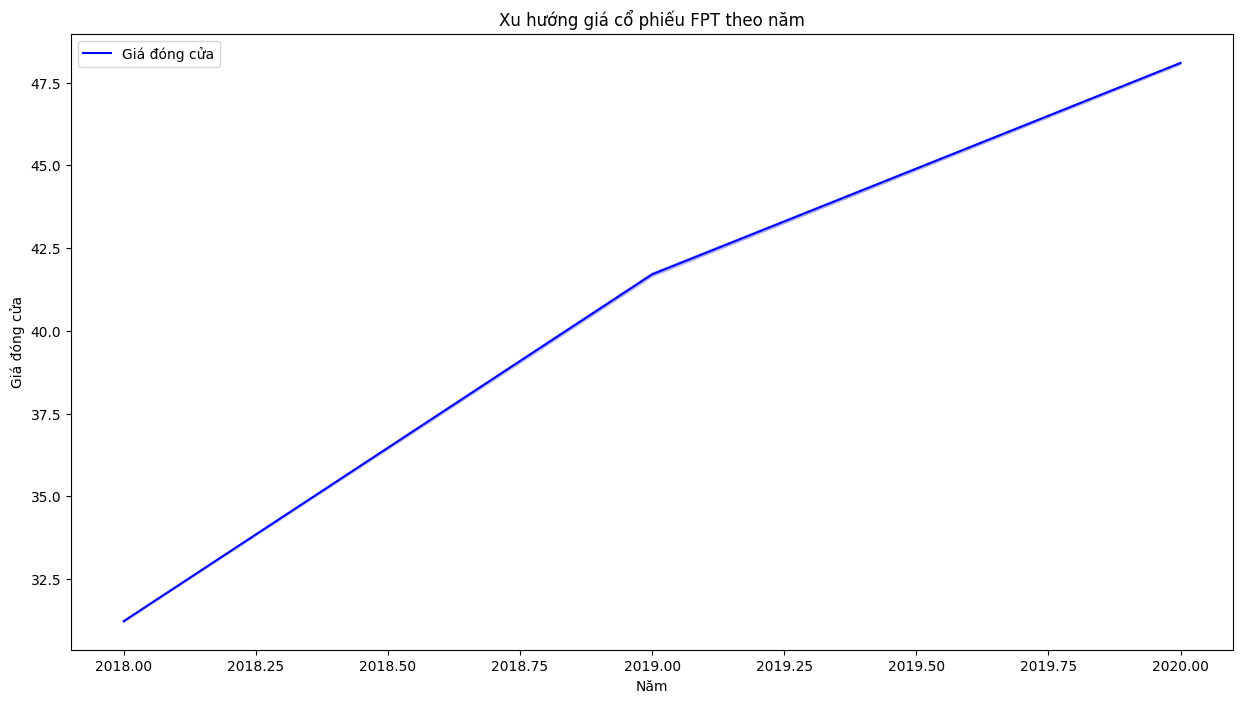

In [12]:
# Lọc dữ liệu cho cổ phiếu FPT
fpt_data = dataset[dataset['Ticker'] == 0]

# Đặt kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Sử dụng lineplot để vẽ xu hướng giá cổ phiếu của FPT theo năm
sns.lineplot(x='Year', y='Close', data=fpt_data, label='Giá đóng cửa', color='blue')

# Xác định các thông tin về trục và tiêu đề
plt.title('Xu hướng giá cổ phiếu FPT theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.legend()

# Hiển thị biểu đồ
plt.show()

## Xu hướng của cổ phiếu công ty cổ phần tập đoàn Masan (MSN)

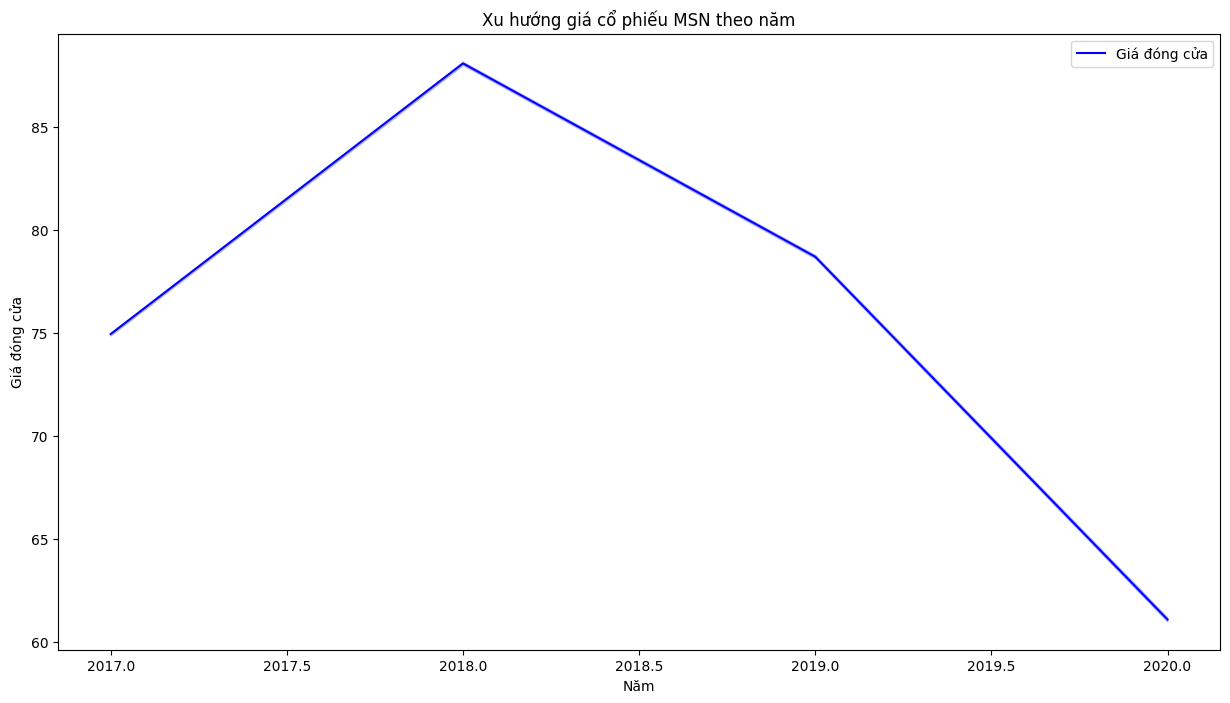

In [13]:
# Lọc dữ liệu cho cổ phiếu MSN
msn_data = dataset[dataset['Ticker'] == 1]

# Đặt kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Sử dụng lineplot để vẽ xu hướng giá cổ phiếu của MSN theo năm
sns.lineplot(x='Year', y='Close', data=msn_data, label='Giá đóng cửa', color='blue')

# Xác định các thông tin về trục và tiêu đề
plt.title('Xu hướng giá cổ phiếu MSN theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.legend()

# Hiển thị biểu đồ
plt.show()

## Xu hướng cổ phiếu của công ty cổ phần vàng bạc đá quý Phú Nhuận (PNJ)

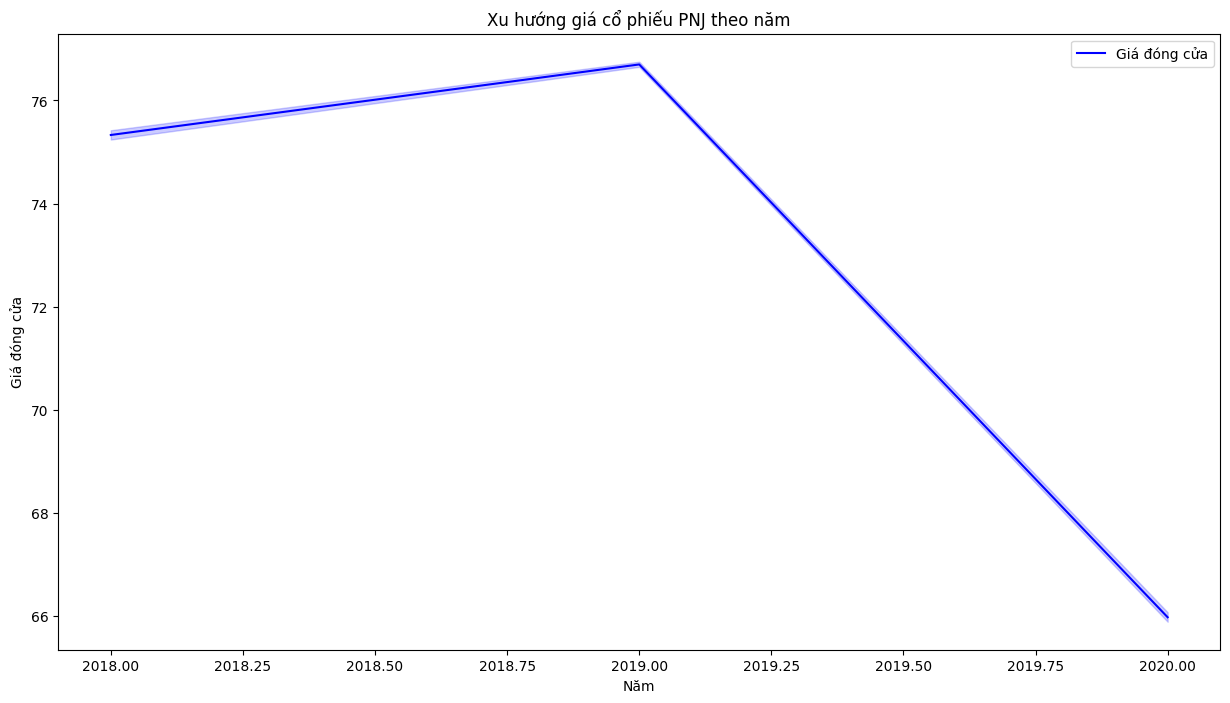

In [14]:
# Lọc dữ liệu cho cổ phiếu PNJ
pnj_data = dataset[dataset['Ticker'] == 2]

# Đặt kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Sử dụng lineplot để vẽ xu hướng giá cổ phiếu của PNJ theo năm
sns.lineplot(x='Year', y='Close', data=pnj_data, label='Giá đóng cửa', color='blue')

# Xác định các thông tin về trục và tiêu đề
plt.title('Xu hướng giá cổ phiếu PNJ theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Xu hướng cổ phiếu của tập đoàn Vingroup (VIC)

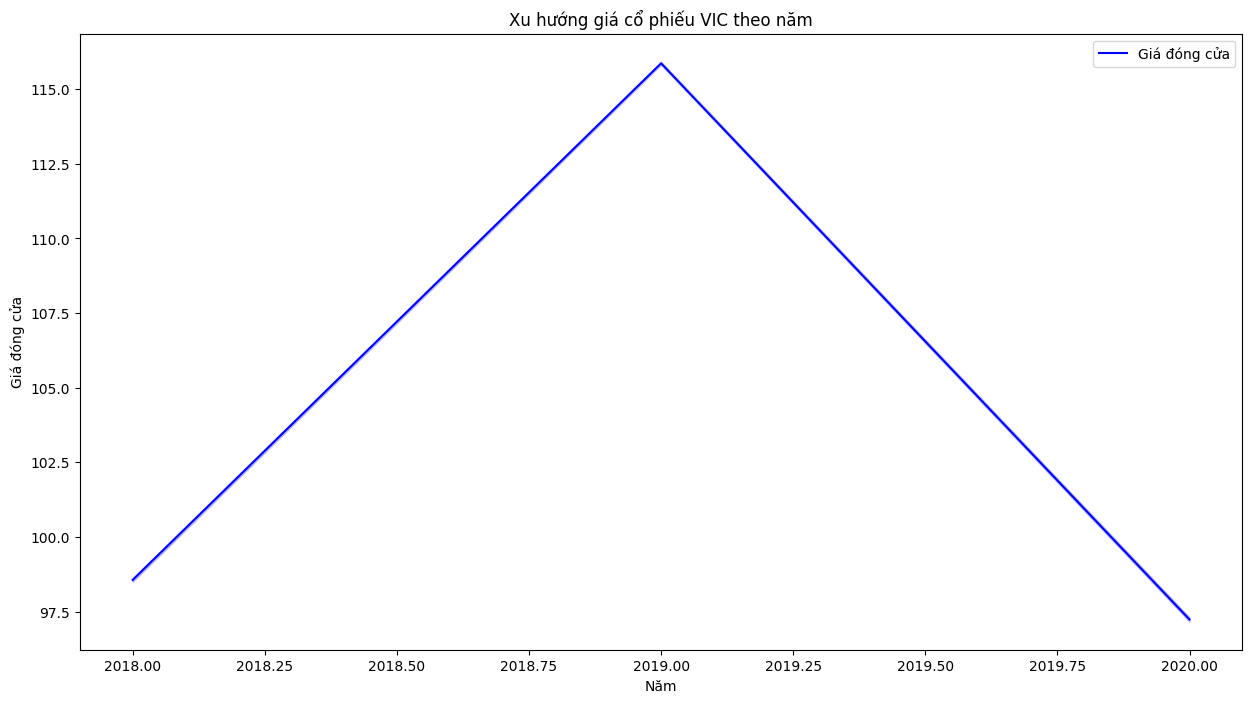

In [15]:
# Lọc dữ liệu cho cổ phiếu VIC
vic_data = dataset[dataset['Ticker'] == 3]

# Đặt kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Sử dụng lineplot để vẽ xu hướng giá cổ phiếu của VIC theo năm
sns.lineplot(x='Year', y='Close', data=vic_data, label='Giá đóng cửa', color='blue')

# Xác định các thông tin về trục và tiêu đề
plt.title('Xu hướng giá cổ phiếu VIC theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# **CHUẨN BỊ DỮ LIỆU HUẤN LUYỆN**

In [16]:
#Ta sẽ lấy các đặc trưng gồm mã cổ phiếu (Ticker), giá mở cửa (Open),
#giá trần (High), giá sàn (Low) và Khối lượng cổ phiếu khơp lệnh (Volume) để
#làm dữ liệu cho tập X, và giá đóng cửa (Close) sẽ là dữ liệu ta cần dự đoán (y)
X = dataset[["Ticker", "Open", "High", "Low", "Volume"]]
y = dataset["Close"]

In [17]:
#phân chia dữ liệu thành các tập train và test, tỉ lệ sẽ là 0.8 cho train và 
#0.2 cho test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#scale dữ liệu về khoảng (0, 1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.values.reshape(-1, 1))

In [19]:
#Reshape dữ liệu theo yêu cầu đầu vào của LSTM (Sample,Timestep,Features)
X_train = X_train.reshape(X_train.shape[0],1,5)
X_test = X_test.reshape(X_test.shape[0],1,5)

# **HUẤN LUYỆN DỮ LIỆU**

In [20]:
#Early Stopping để tránh overfitting
callbacks = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights= True)

In [21]:
#Sử dụng GPU để train
os.environ["CUDA_VISIBLE_DEVICES"]="0"

model = Model()
model.compile()
model.summary()

model.fit(X_train, y_train, 32, 100, callbacks, 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 7)              364       
                                                                 
 dropout (Dropout)           (None, 1, 7)              0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             18432     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [22]:
eval = model.evaluate(X_test, y_test)

2871/2871 [==============================] - 5s 2ms/step - loss: 0.0028
Mean Squared Error:  0.0028430300299078226


In [23]:
#thực hiện dự đoán trên tập X test
y_pred = model.predict(X_test)

2871/2871 [==============================] - 5s 2ms/step


In [24]:
#Lúc này do ta đã scale dữ liệu về khoảng (0, 1) nên cần thực hiện việc 
#chuyển chúng về giá trị thật
y_pred = scaler.inverse_transform(y_pred)
y_test =scaler.inverse_transform(y_test)

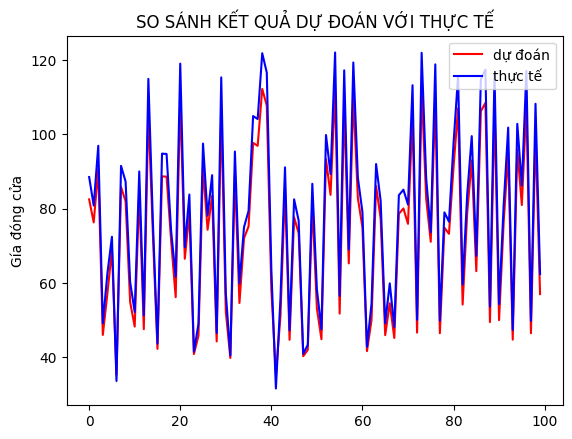

In [25]:
#Trực quan hóa dữ liệu dự đoán và dữ liệu thực tế
#Bởi vì dữ liệu dự đoán và thực tế là khoảng 90000 mẫu cho mỗi bộ dữ liệu
#nên ta sẽ chỉ so sánh 100 mẫu đầu tiên của từng bộ
plt.plot(y_pred[:100], color='r')
plt.plot(y_test[:100] ,color='b')
plt.title("SO SÁNH KẾT QUẢ DỰ ĐOÁN VỚI THỰC TẾ")
plt.ylabel("Gía đóng cửa")
plt.legend(('dự đoán', 'thực tế'),loc='upper right')
plt.show()

In [27]:
model.save()